In [1]:
import sympy 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


path = r"C:\Users\PRADMIN\Desktop\PIB Função de Produção\master_file.xlsx"
w_df = pd.read_excel(path, sheetname='python_input')

w_df

,y,phi,k,t,h,l,gamma,e
1900,2.372034e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1901,2.712768e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1902,2.699663e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1903,2.752083e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1904,2.791399e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1905,2.883135e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1906,3.250079e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1907,3.276289e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1908,3.171448e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1909,3.499077e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
####################
# SYMBOLIC ALGEBRA #
####################

# Define variables

y, a, phi, k, t, h, gamma, l, e, alpha, beta  = sympy.symbols('y a phi k t h gamma l e alpha beta')

# Set model, solve for A

eq_y = sympy.Eq(y, a * ((phi*k) ** alpha) * (t ** beta) * ( (h * gamma * l * e ) ** (1-alpha-beta)))
eq_a = sympy.solve(eq_y, a)

eq_a

[t**(-beta)*y*(k*phi)**(-alpha)*(e*gamma*h*l)**(alpha + beta - 1)]

In [3]:
##################
# SET PARAMETERS #
##################
    
alpha = 0.4 # Capital Share
beta = 0.05 # Land share
dep = 0.1 # Depreciation rate
s = 0.2 # Savings rate
ca = -0.03 # Current account
tfp_growth = 0.00 # TFP growth in forecast period

# Mean reversion or convergence of other paramenters

parameters = { 'phi': np.mean(w_df.loc[1990:2010]['phi']) ,
               'gamma': np.mean(w_df.loc[1990:2010]['gamma']),
               'e': 12,
               'h': 36,
               't': 3500000,
               'l': 150000000
}

# Convergence factors

convergence = { 'phi': 0.9 ,
               'gamma': 0.9,
               'e': 0.95,
               'h': 0.95,
               't': 0.99,
               'l': 0.95
               }

# Set labels

labels = {
        'h': 'Horas trabalhadas por semana, média',
        'e': 'Escolaridade média, em anos',
        'gamma': 'Taxa de emprego',
        'phi': 'Taxa de utilização de capital',
        't': 'Terra',
        'l': 'Força de Trabalho',
        'a': 'Produtividade Total dos Fatores',
        'y': 'PIB real',
        'k': 'Estoque de Capital',
        'Dy': "Crescimento anual do PIB"
        }

In [4]:
# Use solution eq_a to fit TFP

w_df['a'] = (w_df['y'] / 
            (
                ( w_df['phi'] * w_df['k'] ) ** alpha *
                  w_df['t'] ** beta *
                ( w_df['e'] * w_df['gamma'] * w_df['l'] * w_df['e'] ) ** (1-alpha-beta)
            ))

# Do the inverse to make sure your calculation is right

w_df['yz'] = (w_df['a'] *
            (
                ( w_df['phi'] * w_df['k'] ) ** alpha *
                  w_df['t'] ** beta *
                ( w_df['e'] * w_df['gamma'] * w_df['l'] * w_df['e'] ) ** (1-alpha-beta)
            ))

w_df

,y,phi,k,t,h,l,gamma,e,a,yz
1900,2.372034e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1901,2.712768e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1902,2.699663e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1903,2.752083e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1904,2.791399e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1905,2.883135e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1906,3.250079e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1907,3.276289e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1908,3.171448e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1909,3.499077e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
#######################
# EXOGENOUS FORECASTS #
#######################

# Forecast parameters

last_actual = max(w_df.index)
first = last_actual+1
last = first+30

w_df = w_df.append(pd.DataFrame(columns=w_df.columns, index=range(first,last+1)))

w_df = w_df.loc[1980:]

for key in parameters.keys():
    w_df.loc[last,key] = parameters[key]
    for year in range(first,last+1):
        w_df.loc[year,key] = convergence[key] * w_df.loc[year-1,key] + (1-convergence[key]) * parameters[key]

# Forecasting, TFP growth

for year in range(first, last+1):
     w_df.loc[year,'a'] = (1 + tfp_growth) * w_df.loc[year-1,'a']

w_df

,y,phi,k,t,h,l,gamma,e,a,yz
1980,1.956371e+06,0.954000,4472866.0,2.242780e+06,45.980701,4.766100e+07,0.533613,3.822322,0.040582,1.956371e+06
1981,1.873225e+06,0.893000,4746516.3,2.258240e+06,45.712467,4.914788e+07,0.538022,3.834336,0.037991,1.873225e+06
1982,1.888773e+06,0.871000,4974322.2,2.281360e+06,45.445797,5.063475e+07,0.556138,3.846387,0.036535,1.888773e+06
1983,1.833432e+06,0.841000,5120592.6,2.288210e+06,45.180683,5.212163e+07,0.564440,4.002000,0.033219,1.833432e+06
1984,1.932437e+06,0.854000,5255597.3,2.299240e+06,44.970342,5.360851e+07,0.573097,4.095939,0.032772,1.932437e+06
1985,2.084134e+06,0.896000,5413480.9,2.310410e+06,44.723580,5.509538e+07,0.599858,4.286102,0.031305,2.084134e+06
1986,2.240235e+06,0.929000,5648254.6,2.340550e+06,44.734040,5.658226e+07,0.610494,4.386000,0.031009,2.240235e+06
1987,2.319316e+06,0.926000,5863822.1,2.357910e+06,44.598641,5.806914e+07,0.623792,4.493995,0.030025,2.319316e+06
1988,2.317924e+06,0.917000,6044640.3,2.376870e+06,44.308507,5.955601e+07,0.621362,4.623653,0.028495,2.317924e+06
1989,2.391170e+06,0.925000,6221292.5,2.394320e+06,43.513123,6.104289e+07,0.623341,4.699167,0.028004,2.391170e+06


In [6]:
########################
# ENDOGENOUS FORECASTS #
########################

# Copy Real GDP

w_df['y_model'] = w_df['y'].copy()

# Set iterative algorithm

def min_k(period, max_iter = 100, tolerance=1e-8):
    n_iter = 1
    
    # In the first iteration, the capital stock will be constant
        # We then solve for Y
    
    if n_iter == 1:
        w_df.loc[period,'k'] = w_df.loc[period-1,'k']
        w_df.loc[period,'y_model'] =    (
                                    w_df.loc[period,'a'] *
                                    (
                                     ( w_df.loc[period,'phi'] *
                                       w_df.loc[period,'k'] )
                                      ** alpha
                                     ) *
                                     ( w_df.loc[period,'t'] ** beta ) *
                                     (
                                      ( w_df.loc[period,'e'] *
                                        w_df.loc[period,'gamma'] *
                                        w_df.loc[period,'l'] *
                                        w_df.loc[period,'e'] )
                                      ** (1-alpha-beta)
                                     )
                                    )
        n_iter += 1
        
    pass
    
    # Starting in the second iteration, we let capital stock
        # depreciate and increase with domestic and foreign
        # savings. We then solve for Y again, based on the
        # new capital stock, and repeat the process again
        # until (a) the percent change in Y for the iteration is
        # smaller than set tolerance; or (b) we reach the
        # maximum number of iterations.   

    while n_iter <= max_iter:
       y_b = w_df.loc[period,'y']
       
       w_df.loc[period,'k'] = ((1-dep) * w_df.loc[period-1,'k'] +
                                (s - ca) * w_df.loc[period,'y_model'])
            
       w_df.loc[period,'y_model'] = (
                                    w_df.loc[period,'a'] *
                                    (
                                     ( w_df.loc[period,'phi'] *
                                       w_df.loc[period,'k'] )
                                      ** alpha
                                     ) *
                                     ( w_df.loc[period,'t'] ** beta ) *
                                     (
                                      ( w_df.loc[period,'e'] *
                                        w_df.loc[period,'gamma'] *
                                        w_df.loc[period,'l'] *
                                        w_df.loc[period,'e'] )
                                      ** (1-alpha-beta)
                                     )
                                )

       n_iter += 1
             
       change = w_df.loc[period,'y'] / y_b - 1
      
       if change < tolerance:
           break
       else:
           continue

# Run the iteration algorithm for each period

for year in range(first, last+1):
     min_k(year)

w_df

,y,phi,k,t,h,l,gamma,e,a,yz,y_model
1980,1.956371e+06,0.954000,4.472866e+06,2.242780e+06,45.980701,4.766100e+07,0.533613,3.822322,0.040582,1.956371e+06,1.956371e+06
1981,1.873225e+06,0.893000,4.746516e+06,2.258240e+06,45.712467,4.914788e+07,0.538022,3.834336,0.037991,1.873225e+06,1.873225e+06
1982,1.888773e+06,0.871000,4.974322e+06,2.281360e+06,45.445797,5.063475e+07,0.556138,3.846387,0.036535,1.888773e+06,1.888773e+06
1983,1.833432e+06,0.841000,5.120593e+06,2.288210e+06,45.180683,5.212163e+07,0.564440,4.002000,0.033219,1.833432e+06,1.833432e+06
1984,1.932437e+06,0.854000,5.255597e+06,2.299240e+06,44.970342,5.360851e+07,0.573097,4.095939,0.032772,1.932437e+06,1.932437e+06
1985,2.084134e+06,0.896000,5.413481e+06,2.310410e+06,44.723580,5.509538e+07,0.599858,4.286102,0.031305,2.084134e+06,2.084134e+06
1986,2.240235e+06,0.929000,5.648255e+06,2.340550e+06,44.734040,5.658226e+07,0.610494,4.386000,0.031009,2.240235e+06,2.240235e+06
1987,2.319316e+06,0.926000,5.863822e+06,2.357910e+06,44.598641,5.806914e+07,0.623792,4.493995,0.030025,2.319316e+06,2.319316e+06
1988,2.317924e+06,0.917000,6.044640e+06,2.376870e+06,44.308507,5.955601e+07,0.621362,4.623653,0.028495,2.317924e+06,2.317924e+06
1989,2.391170e+06,0.925000,6.221292e+06,2.394320e+06,43.513123,6.104289e+07,0.623341,4.699167,0.028004,2.391170e+06,2.391170e+06


In [7]:
# To avoid a break, smooth the transition between actual GDP
     # and model forecast

parameter = 0.8
for year in range(first, last+1):
    w_df['y'].loc[year] = parameter * w_df['y'].loc[year-1] + (1-parameter) * w_df['y_model'].loc[year-1]

# Calculate percent change in Real GDP
     
change = [w_df.loc[period,'y'] / w_df.loc[period-1,'y'] - 1 for period in w_df.index[1:]]
w_df['Dy'] = ([np.nan] + change)

w_df

,y,phi,k,t,h,l,gamma,e,a,yz,y_model,Dy
1980,1.956371e+06,0.954000,4.472866e+06,2.242780e+06,45.980701,4.766100e+07,0.533613,3.822322,0.040582,1.956371e+06,1.956371e+06,NaN
1981,1.873225e+06,0.893000,4.746516e+06,2.258240e+06,45.712467,4.914788e+07,0.538022,3.834336,0.037991,1.873225e+06,1.873225e+06,-0.042500
1982,1.888773e+06,0.871000,4.974322e+06,2.281360e+06,45.445797,5.063475e+07,0.556138,3.846387,0.036535,1.888773e+06,1.888773e+06,0.008300
1983,1.833432e+06,0.841000,5.120593e+06,2.288210e+06,45.180683,5.212163e+07,0.564440,4.002000,0.033219,1.833432e+06,1.833432e+06,-0.029300
1984,1.932437e+06,0.854000,5.255597e+06,2.299240e+06,44.970342,5.360851e+07,0.573097,4.095939,0.032772,1.932437e+06,1.932437e+06,0.054000
1985,2.084134e+06,0.896000,5.413481e+06,2.310410e+06,44.723580,5.509538e+07,0.599858,4.286102,0.031305,2.084134e+06,2.084134e+06,0.078500
1986,2.240235e+06,0.929000,5.648255e+06,2.340550e+06,44.734040,5.658226e+07,0.610494,4.386000,0.031009,2.240235e+06,2.240235e+06,0.074900
1987,2.319316e+06,0.926000,5.863822e+06,2.357910e+06,44.598641,5.806914e+07,0.623792,4.493995,0.030025,2.319316e+06,2.319316e+06,0.035300
1988,2.317924e+06,0.917000,6.044640e+06,2.376870e+06,44.308507,5.955601e+07,0.621362,4.623653,0.028495,2.317924e+06,2.317924e+06,-0.000600
1989,2.391170e+06,0.925000,6.221292e+06,2.394320e+06,43.513123,6.104289e+07,0.623341,4.699167,0.028004,2.391170e+06,2.391170e+06,0.031600


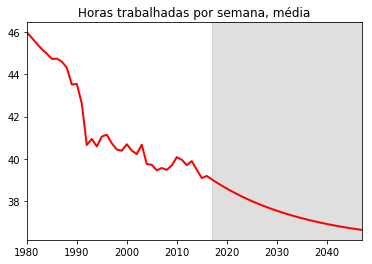

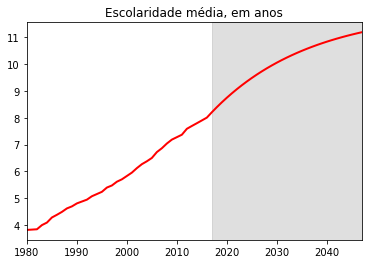

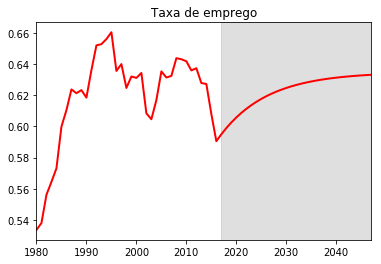

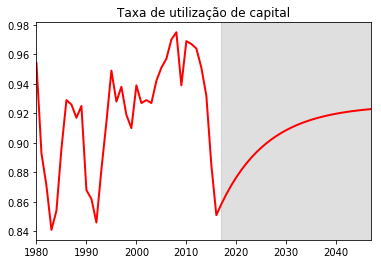

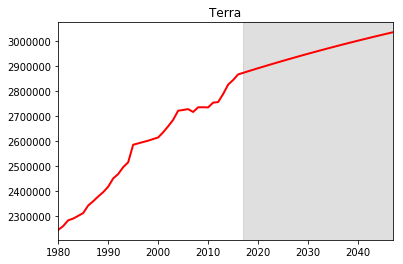

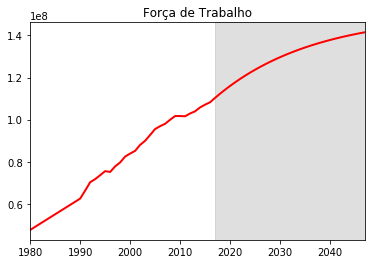

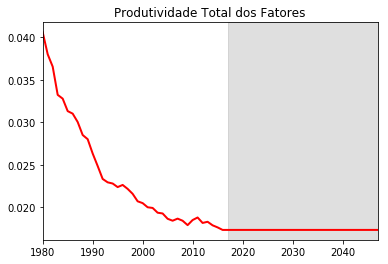

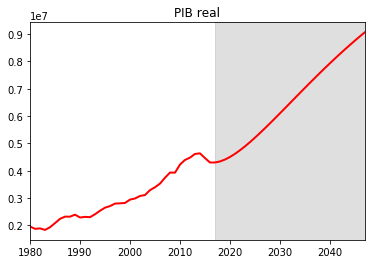

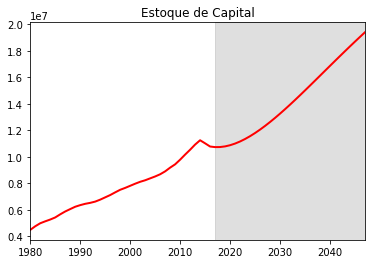

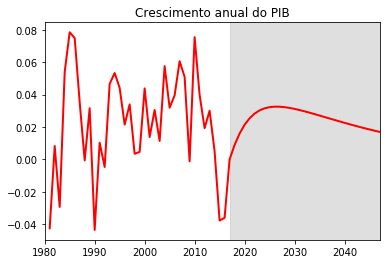

In [8]:
###############
# PLOT CHARTS #
###############

for key in labels.keys():
    w_df[key].plot(title=labels[key], color='red', linewidth=2)
    plt.axvspan(first,last, color='gray', alpha=0.25)
    plt.show()      